In [5]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.circuit.library.standard_gates import C3XGate,C4XGate
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-10-11 07:58:21,009: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
backend = Aer.get_backend('qasm_simulator')

### quantum cirucit

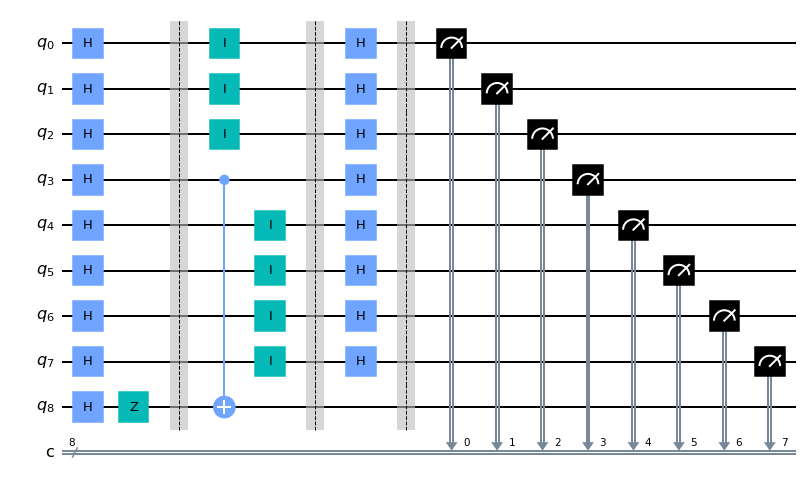

In [4]:
qc = QuantumCircuit(9,8)

for i in range(9):
    qc.h(i)

qc.z(8)
qc.barrier()
j = [3]
for i in range(8):
    if i in j:
        qc.cx(i,8)
    else:
        qc.i(i)

qc.barrier()

for i in range(8):
    qc.h(i)
qc.barrier()

for i in range(8):
    qc.measure(i,i)
    
qc.draw()



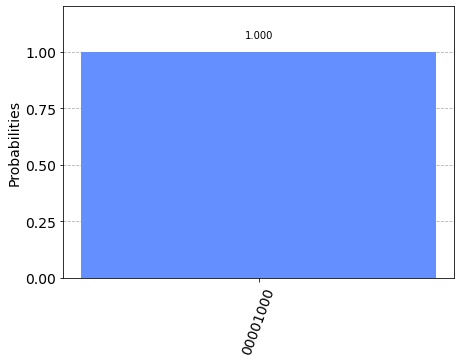

In [5]:
result = backend.run(transpile(qc, backend), shots=2048).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

## W-transform Circuit

#### N = 3

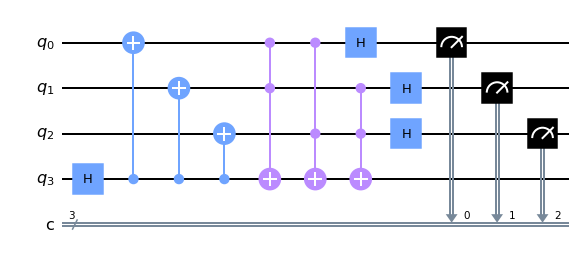

In [3]:
qc = QuantumCircuit(4,3)

qc.h(3)

for i in range(3):
    qc.cx(3,i)
    
qc.ccx(0,1,3)
qc.ccx(0,2,3)
qc.ccx(1,2,3)

for i in range(3):
    qc.h(i)

for i in range(3):
    qc.measure(i,i)

qc.draw()

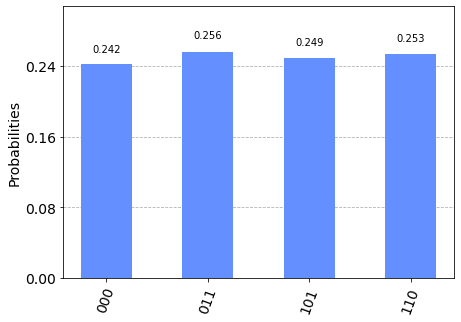

In [9]:
result = backend.run(transpile(qc, backend), shots=4096).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

### N = 5

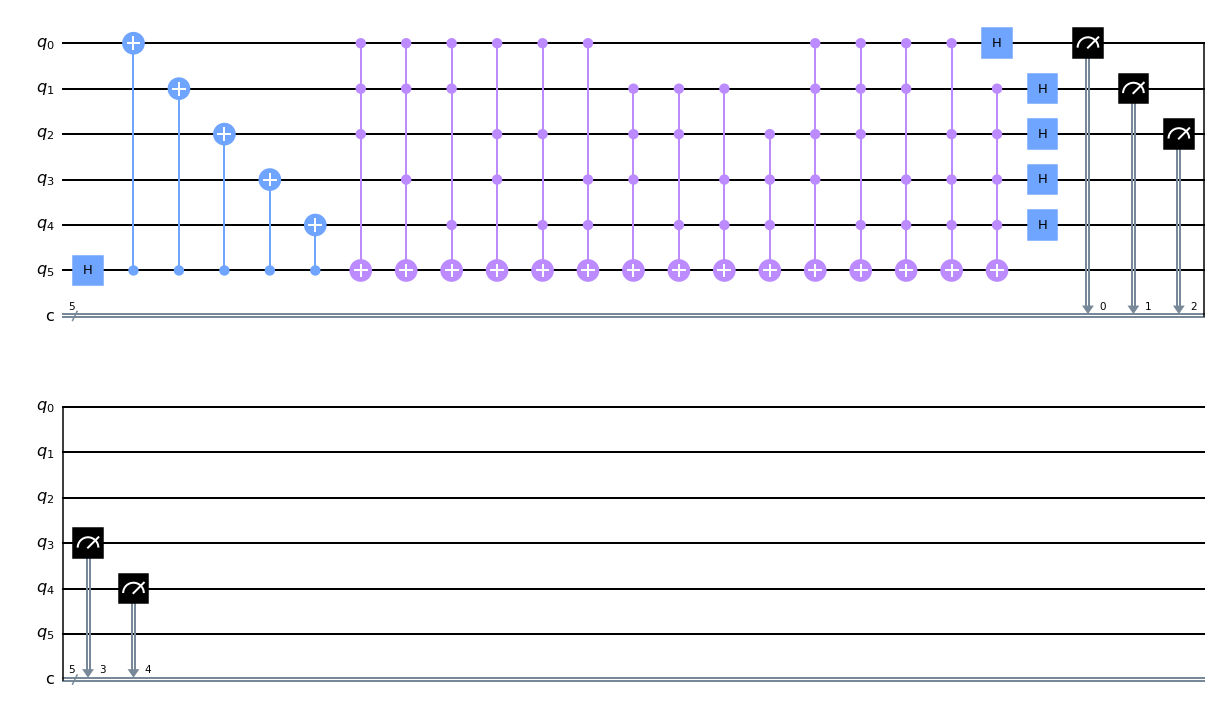

In [7]:
qc = QuantumCircuit(6,5)
qc.h(5)
for i in range(5):
    qc.cx(5,i)
    
c3x = [(0,1,2,5)
,(0,1,3,5)
,(0,1,4,5)
,(0,2,3,5)
,(0,2,4,5)
,(0,3,4,5)
,(1,2,3,5)
,(1,2,4,5)
,(1,3,4,5)
,(2,3,4,5)]
for i in c3x:
    qc.append(C3XGate(), list(i))

c4x = [(0,1,2,3,5)
,(0,1,2,4,5)
,(0,1,3,4,5)
,(0,2,3,4,5)
,(1,2,3,4,5)]
for i in c4x:
    qc.append(C4XGate(),list(i))

for i in range(5):
    qc.h(i)

for i in range(5):
    qc.measure(i,i)

qc.draw()

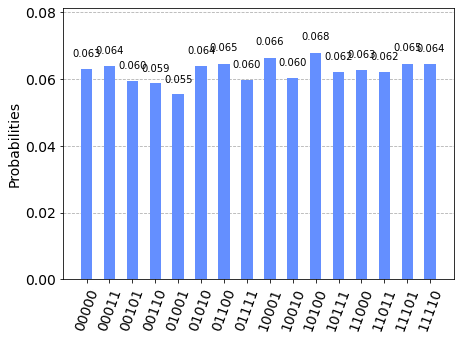

In [9]:
result = backend.run(transpile(qc, backend), shots=4096).result()
counts  = result.get_counts(qc)
plot_histogram(counts)